In [1]:
import pandas as pd
import numpy as np
skiprows = np.random.rand(55 * 10 ** 7) > 0.02
skiprows[0] = False
df = pd.read_csv('train.csv', skiprows=lambda x: skiprows[x])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2013-11-24 11:42:00.000000113,9.0,2013-11-24 11:42:00 UTC,-73.957740,40.773617,-73.977087,40.758465,6
1,2010-06-17 16:12:58.0000001,10.5,2010-06-17 16:12:58 UTC,-73.966473,40.757500,-73.993336,40.745051,1
2,2014-11-04 12:11:19.0000003,8.0,2014-11-04 12:11:19 UTC,-73.975189,40.759095,-73.980510,40.767610,1
3,2012-07-31 19:20:00.00000027,4.9,2012-07-31 19:20:00 UTC,-74.002707,40.726640,-73.991825,40.727220,2
4,2014-03-03 23:30:00.00000072,13.5,2014-03-03 23:30:00 UTC,-73.981627,40.780420,-74.008465,40.734012,2


In [2]:
df.shape

(1109086, 8)

In [3]:
df1 = pd.read_csv('test.csv')
df1.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [4]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],utc=True)
df1['pickup_datetime'] = pd.to_datetime(df1['pickup_datetime'],utc=True)

In [28]:

df.dropna(inplace=True)

df.drop(df.index[(df.pickup_longitude < -75) | 
           (df.pickup_longitude > -72) | 
           (df.pickup_latitude < 40) | 
           (df.pickup_latitude > 42)],inplace=True)
df.drop(df.index[(df.dropoff_longitude < -75) | 
           (df.dropoff_longitude > -72) | 
           (df.dropoff_latitude < 40) | 
           (df.dropoff_latitude > 42)],inplace=True)

In [5]:
X_train = df.iloc[:,2:]
Y_train = df['fare_amount']

In [6]:
X_test = df1.iloc[:,1:]

In [7]:
X_train['pickup_datetime'][3].dayofweek

1

In [16]:
!pip install holidays==9.1.2

ERROR: Could not find a version that satisfies the requirement holidays==9.1.2 (from versions: 0.1, 0.2, 0.3, 0.3.1, 0.4, 0.4.1, 0.5, 0.6, 0.7, 0.8, 0.8.1, 0.9.3, 0.9.4, 0.9.5, 0.9.6, 0.9.7, 0.9.8, 0.9.9, 0.9.10, 0.9.11, 0.9.12, 0.10.1, 0.10.2, 0.10.3, 0.10.4, 0.10.5.2, 0.11.1)
ERROR: No matching distribution found for holidays==9.1.2


In [9]:
!pip install haversine

In [20]:
import holidays
us_holidays = holidays.US()

In [10]:
import haversine as hs
from tqdm import tqdm
df['distance_travelled'] = None
df['pickup_location'] = list(zip(df.pickup_latitude, df.pickup_longitude))
df['dropoff_location'] = list(zip(df.dropoff_latitude, df.dropoff_longitude))
for i in tqdm(range(df.shape[0])):
    df['distance_travelled'][i] = hs.haversine(df['pickup_location'][i],df['dropoff_location'][i])
    df['is_a_holiday'][i] = df['pickup_datetime'][i] in us_holidays
df['is_a_holiday'].apply(int)

  0%|                                                                                      | 0/1109086 [00:00<?, ?it/s]<ipython-input-10-5c51f4faf8d5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_travelled'][i] = hs.haversine(df['pickup_location'][i],df['dropoff_location'][i])
  0%|                                                                                      | 0/1109086 [00:00<?, ?it/s]


NameError: name 'us_holidays' is not defined

In [21]:
import haversine as hs
from tqdm import tqdm
df['distance'] = list(zip(list(zip(df.pickup_latitude, df.pickup_longitude)),list(zip(df.dropoff_latitude, df.dropoff_longitude))))
df['distance_travelled'] = df['distance'].apply(lambda x: hs.haversine(x[0],x[1]))
df['year'] = df['pickup_datetime'].apply(lambda x: x.year)
df['month'] = df['pickup_datetime'].apply(lambda x:x.month)
df['day'] = df['pickup_datetime'].apply(lambda x: x.dayofweek)
df["befor_shock"] = ((df["year"] <= 2011) | ((df["year"] <= 2012) & (df["month"] <= 8))).apply(int)
df['is_a_holiday'] = (df['pickup_datetime'].apply(lambda x: x in us_holidays)).apply(int)
df['passenger_count'] = (df['passenger_count']<5).apply(int)
df["time"] = df["pickup_datetime"].apply(lambda x: x.hour * 60 + x.minute)

In [22]:
df1['distance'] = list(zip(list(zip(df1.pickup_latitude, df1.pickup_longitude)),list(zip(df1.dropoff_latitude, df1.dropoff_longitude))))
df1['distance_travelled'] = df1['distance'].apply(lambda x: hs.haversine(x[0],x[1]))
df1['year'] = df1['pickup_datetime'].apply(lambda x: x.year)
df1['month'] = df1['pickup_datetime'].apply(lambda x:x.month)
df1['day'] = df1['pickup_datetime'].apply(lambda x: x.dayofweek)
df1["befor_shock"] = ((df1["year"] <= 2011) | ((df1["year"] <= 2012) & (df1["month"] <= 8))).apply(int)
df1['is_a_holiday'] = (df1['pickup_datetime'].apply(lambda x: x in us_holidays)).apply(int)
df1['passenger_count'] = (df1['passenger_count']<5).apply(int)
df1["time"] = df1["pickup_datetime"].apply(lambda x: x.hour * 60 + x.minute)

In [23]:
import geopy.distance

def geodesic_dist(trip):
    pickup_lat = trip['pickup_latitude']
    pickup_long = trip['pickup_longitude']
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    distance = geopy.distance.geodesic((pickup_lat, pickup_long), 
                                       (dropoff_lat, dropoff_long)).miles
    try:
        return distance
    except ValueError:
        return np.nan
    
def circle_dist(trip):
    pickup_lat = trip['pickup_latitude']
    pickup_long = trip['pickup_longitude']
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    distance = geopy.distance.great_circle((pickup_lat, pickup_long), 
                                       (dropoff_lat, dropoff_long)).miles
    try:
        return distance
    except ValueError:
        return np.nan

In [24]:

def jfk_dist(trip):
    jfk_lat = 40.6413
    jfk_long = -73.7781
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    jfk_distance = geopy.distance.geodesic((dropoff_lat, dropoff_long), (jfk_lat, jfk_long)).miles
    return jfk_distance

def lga_dist(trip):
    lga_lat = 40.7769
    lga_long = -73.8740
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    lga_distance = geopy.distance.geodesic((dropoff_lat, dropoff_long), (lga_lat, lga_long)).miles
    return lga_distance

def ewr_dist(trip):
    ewr_lat = 40.6895
    ewr_long = -74.1745
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    ewr_distance = geopy.distance.geodesic((dropoff_lat, dropoff_long), (ewr_lat, ewr_long)).miles
    return ewr_distance

def tsq_dist(trip):
    tsq_lat = 40.7580
    tsq_long = -73.9855
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    tsq_distance = geopy.distance.geodesic((dropoff_lat, dropoff_long), (tsq_lat, tsq_long)).miles
    return tsq_distance
def cpk_dist(trip):
    cpk_lat = 40.7812
    cpk_long = -73.9665
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    cpk_distance = geopy.distance.geodesic((dropoff_lat, dropoff_long), (cpk_lat, cpk_long)).miles
    return cpk_distance

def lib_dist(trip):
    lib_lat = 40.6892
    lib_long = -74.0445
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    lib_distance = geopy.distance.geodesic((dropoff_lat, dropoff_long), (lib_lat, lib_long)).miles
    return lib_distance

def gct_dist(trip):
    gct_lat = 40.7527
    gct_long = -73.9772
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    gct_distance = geopy.distance.geodesic((dropoff_lat, dropoff_long), (gct_lat, gct_long)).miles
    return gct_distance

def met_dist(trip):
    met_lat = 40.7794
    met_long = -73.9632
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    met_distance = geopy.distance.geodesic((dropoff_lat, dropoff_long), (met_lat, met_long)).miles
    return met_distance

def wtc_dist(trip):
    wtc_lat = 40.7126
    wtc_long = -74.0099
    dropoff_lat = trip['dropoff_latitude']
    dropoff_long = trip['dropoff_longitude']
    wtc_distance = geopy.distance.geodesic((dropoff_lat, dropoff_long), (wtc_lat, wtc_long)).miles
    return wtc_distance

In [25]:
def optimize_floats(df):
    floats = df.select_dtypes(include=['float64']).columns.tolist()
    df[floats] = df[floats].apply(pd.to_numeric, downcast='float')
    return df


def optimize_ints(df):
    ints = df.select_dtypes(include=['int64']).columns.tolist()
    df[ints] = df[ints].apply(pd.to_numeric, downcast='integer')
    return df

def optimize(df):
    return optimize_floats(optimize_ints(df))

In [26]:
def calc_dists(df):
    df['geodesic'] = df.apply(lambda x: geodesic_dist(x), axis = 1 )
    df['circle'] = df.apply(lambda x: circle_dist(x), axis = 1 )
    df['jfk'] = df.apply(lambda x: jfk_dist(x), axis = 1 )
    df['lga'] = df.apply(lambda x: lga_dist(x), axis = 1 )
    df['ewr'] = df.apply(lambda x: ewr_dist(x), axis = 1 )
    df['tsq'] = df.apply(lambda x: tsq_dist(x), axis = 1 )
    df['cpk'] = df.apply(lambda x: cpk_dist(x), axis = 1 )
    df['lib'] = df.apply(lambda x: lib_dist(x), axis = 1 )
    df['gct'] = df.apply(lambda x: gct_dist(x), axis = 1 )
    df['met'] = df.apply(lambda x: met_dist(x), axis = 1 )
    df['wtc'] = df.apply(lambda x: wtc_dist(x), axis = 1 )
    return df

In [31]:
df = calc_dists(df)
df1 = calc_dists(df1)

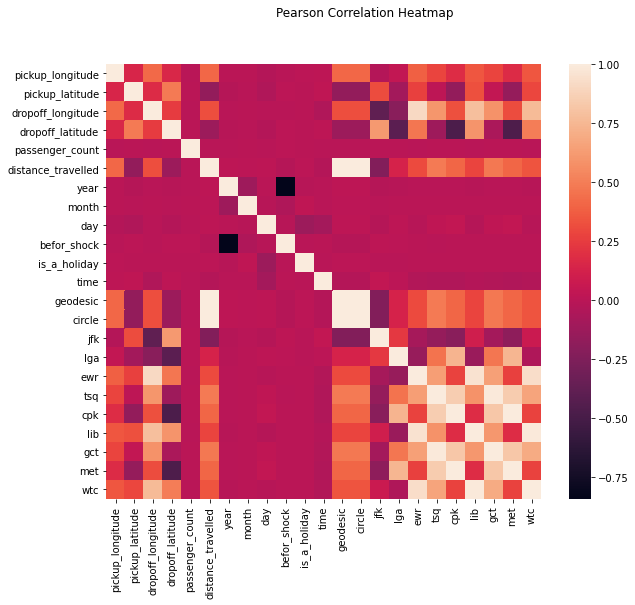

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('fare_amount', axis=1).corr(), square=True)
plt.suptitle('Pearson Correlation Heatmap')
plt.show();

<ipython-input-37-2fa116424e69>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show();


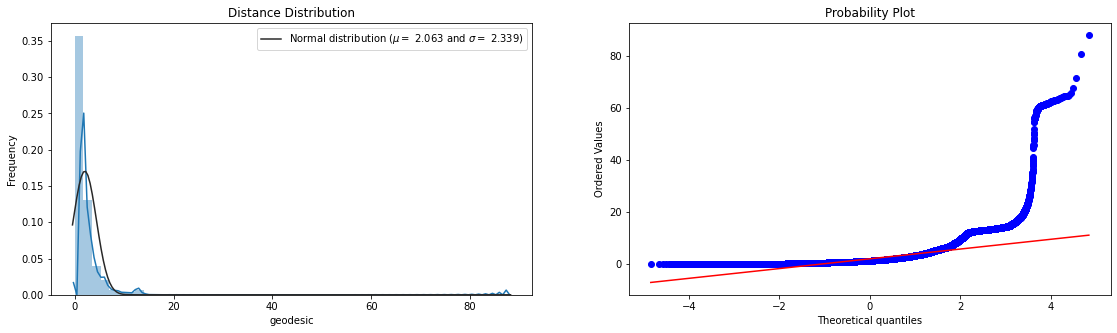

In [37]:
from scipy import stats
from scipy.stats import norm
(mu, sigma) = norm.fit(df['geodesic'])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(df['geodesic'] , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Distance Distribution')
ax2 = stats.probplot(df['geodesic'], plot=plt)
f.show();

<ipython-input-38-a570f7b5a9db>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show();


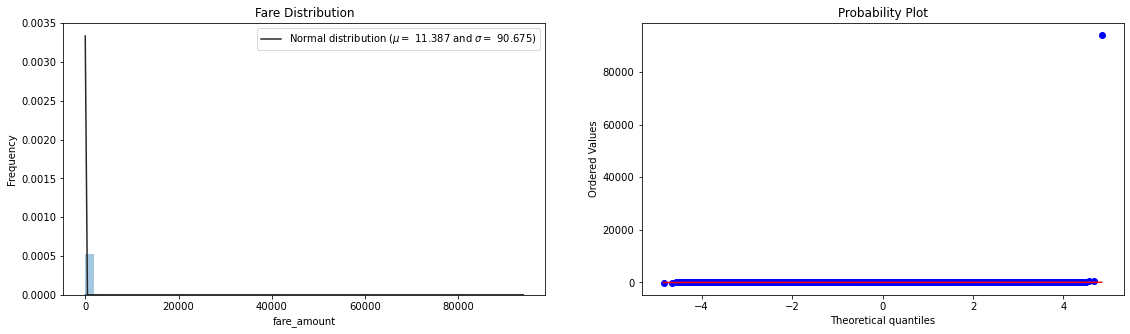

In [38]:
(mu, sigma) = norm.fit(df['fare_amount'])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(df['fare_amount'] , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Fare Distribution')
ax2 = stats.probplot(df['fare_amount'], plot=plt)
f.show();

In [198]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_travelled,year,month,day,befor_shock,is_a_holiday,time
0,2015-04-12 10:19:05.0000001,11.5,2015-04-12 10:19:05+00:00,-73.979279,40.723438,-74.004608,40.746948,0,"((40.72343826293945, -73.97927856445312), (40....",3.374718,2015,4,6,0,0,619
1,2011-01-05 17:39:00.00000040,3.7,2011-01-05 17:39:00+00:00,-73.966957,40.761268,-73.967912,40.765535,1,"((40.761268, -73.966957), (40.765535, -73.9679...",0.481238,2011,1,2,1,0,1059
2,2013-09-17 04:22:00.0000006,19.0,2013-09-17 04:22:00+00:00,-73.987210,40.729325,-73.931985,40.697207,1,"((40.729325, -73.98721), (40.697207, -73.931985))",5.866839,2013,9,1,0,0,262
3,2011-03-09 22:21:25.0000001,9.7,2011-03-09 22:21:25+00:00,-73.977829,40.788979,-73.967935,40.760508,1,"((40.788979, -73.977829), (40.760508, -73.9679...",3.273626,2011,3,2,1,0,1341
4,2009-10-16 10:32:00.000000191,7.3,2009-10-16 10:32:00+00:00,-73.990575,40.746117,-74.003227,40.751447,1,"((40.746117, -73.990575), (40.751447, -74.0032...",1.219496,2009,10,4,1,0,632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108480,2009-04-30 21:37:00.00000040,10.5,2009-04-30 21:37:00+00:00,-73.997763,40.741155,-73.984755,40.717655,1,"((40.741155, -73.997763), (40.717655, -73.9847...",2.833663,2009,4,3,1,0,1297
1108481,2012-08-03 23:31:00.000000184,3.3,2012-08-03 23:31:00+00:00,-73.967117,40.756930,-73.973147,40.755955,1,"((40.75693, -73.967117), (40.755955, -73.973147))",0.519345,2012,8,4,1,0,1411
1108482,2011-02-20 14:03:00.00000051,15.3,2011-02-20 14:03:00+00:00,-73.991902,40.738360,-73.967693,40.792793,1,"((40.73836, -73.991902), (40.792792999999996, ...",6.386844,2011,2,6,1,0,843
1108483,2011-08-06 18:36:47.0000001,7.7,2011-08-06 18:36:47+00:00,-73.992143,40.770590,-73.988171,40.758195,1,"((40.770590000000006, -73.992143), (40.758195,...",1.418278,2011,8,5,1,0,1116


In [150]:
day_dummy=pd.get_dummies(df['day'])

#df=pd.concat([df,train_dummy],axis=1)
#holiday_dummy = pd.get_dummies(df['is_a_holiday'])
#passenger_dummy = pd.get_dummies(df['passeger_count'])
#df=pd.concat([df,day_dummy,holiday_dummy, passenger_dummy],axis=1)
df=pd.concat([df,day_dummy],axis=1)

day1_dummy=pd.get_dummies(df1['day'])
#df=pd.concat([df,train_dummy],axis=1)
#holiday_dummy = pd.get_dummies(df['is_a_holiday'])
#passenger_dummy = pd.get_dummies(df['passeger_count'])
#df=pd.concat([df,day_dummy,holiday_dummy, passenger_dummy],axis=1)
df1=pd.concat([df1,day1_dummy],axis=1)

In [213]:
def oneHotEncode(df,colNames):
    for col in colNames:
        dummies = pd.get_dummies(df[col],prefix=col)
        df = pd.concat([df,dummies],axis=1)

        #drop the encoded column
        df.drop([col],axis = 1 , inplace=True)
    return df
    
cat_cols = ['is_a_holiday','befor_shock','day','month','year','passenger_count']
print('There were {} columns before encoding categorical features'.format(df.shape[1]))
df = oneHotEncode(df, cat_cols)
df1 = oneHotEncode(df1, cat_cols)
print('There are {} columns after encoding categorical features'.format(df.shape[1]))

There were 16 columns before encoding categorical features
There are 42 columns after encoding categorical features


In [200]:
df.dropna(inplace=True)

In [226]:
X_train = df.drop(columns = ['key','fare_amount','distance','pickup_datetime'])
y_train = df['fare_amount']
X_test = df1.drop(columns = ['key','distance','pickup_datetime'])

In [227]:
y_train

0          11.5
1           3.7
2          19.0
3           9.7
4           7.3
           ... 
1108480    10.5
1108481     3.3
1108482    15.3
1108483     7.7
1108484    14.1
Name: fare_amount, Length: 1108472, dtype: float64

In [151]:
dftest = df1.iloc[:,-13:]
dftest.drop(columns = ['day','dropoff_location','pickup_location'],inplace=True)

In [142]:
dftrain.dropna(inplace=True)

In [152]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(dftrain,df['fare_amount'])
y_pred = regr.predict(dftest)

In [6]:
df2 = pd.read_csv('sample_submission.csv')
df2.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35


In [157]:
y_pred.min()

3.3711217078712763

In [263]:
Submission=pd.DataFrame(data=y_pred,columns=['fare_amount'])
Submission['key']=df1['key']
Submission=Submission[['key','fare_amount']]

In [264]:
Submission = Submission.set_index('key')

In [265]:
Submission.to_csv('y1_knn.csv')

In [250]:
Submission.head()

,fare_amount
key,
2015-01-27 13:08:24.0000002,11.292572
2015-01-27 13:08:24.0000003,10.649523
2011-10-08 11:53:44.0000002,4.736473
2012-12-01 21:12:12.0000002,10.116229
2012-12-01 21:12:12.0000003,15.810888


In [246]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=30, n_estimators=100, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [220]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 

In [222]:

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               4992      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 169,857
Trainable params: 169,857
Non-trainable params: 0
_________________________________________________________________


In [238]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [239]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
27699/27712 [============================>.] - ETA: 0s - loss: 2.0851 - mean_absolute_error: 2.0851
Epoch 00001: val_loss improved from inf to 2.10555, saving model to Weights-001--2.10555.hdf5
27712/27712 [==============================] - 36s 1ms/step - loss: 2.0851 - mean_absolute_error: 2.0851 - val_loss: 2.1055 - val_mean_absolute_error: 2.1055
Epoch 2/500
27711/27712 [============================>.] - ETA: 0s - loss: 2.0852 - mean_absolute_error: 2.0852
Epoch 00002: val_loss did not improve from 2.10555
27712/27712 [==============================] - 40s 1ms/step - loss: 2.0852 - mean_absolute_error: 2.0852 - val_loss: 2.1553 - val_mean_absolute_error: 2.1553
Epoch 3/500
27700/27712 [============================>.] - ETA: 0s - loss: 2.0866 - mean_absolute_error: 2.0866
Epoch 00003: val_loss improved from 2.10555 to 2.09226, saving model to Weights-003--2.09226.hdf5
27712/27712 [==============================] - 41s 1ms/step - loss: 2.0866 - mean_absolute_error: 2.0866 

Epoch 26/500
27701/27712 [============================>.] - ETA: 0s - loss: 2.0847 - mean_absolute_error: 2.0847
Epoch 00026: val_loss did not improve from 2.07691
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0849 - mean_absolute_error: 2.0849 - val_loss: 2.1512 - val_mean_absolute_error: 2.1512
Epoch 27/500
27703/27712 [============================>.] - ETA: 0s - loss: 2.0860 - mean_absolute_error: 2.0860
Epoch 00027: val_loss did not improve from 2.07691
27712/27712 [==============================] - 38s 1ms/step - loss: 2.0860 - mean_absolute_error: 2.0860 - val_loss: 2.1021 - val_mean_absolute_error: 2.1021
Epoch 28/500
27691/27712 [============================>.] - ETA: 0s - loss: 2.0852 - mean_absolute_error: 2.0852
Epoch 00028: val_loss did not improve from 2.07691
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0852 - mean_absolute_error: 2.0852 - val_loss: 2.1117 - val_mean_absolute_error: 2.1117
Epoch 29/500
27685/27712 [========

27696/27712 [============================>.] - ETA: 0s - loss: 2.0794 - mean_absolute_error: 2.0794
Epoch 00076: val_loss improved from 2.07296 to 2.06861, saving model to Weights-076--2.06861.hdf5
27712/27712 [==============================] - 38s 1ms/step - loss: 2.0795 - mean_absolute_error: 2.0795 - val_loss: 2.0686 - val_mean_absolute_error: 2.0686
Epoch 77/500
27706/27712 [============================>.] - ETA: 0s - loss: 2.0797 - mean_absolute_error: 2.0797
Epoch 00077: val_loss did not improve from 2.06861
27712/27712 [==============================] - 38s 1ms/step - loss: 2.0796 - mean_absolute_error: 2.0796 - val_loss: 2.0704 - val_mean_absolute_error: 2.0704
Epoch 78/500
27708/27712 [============================>.] - ETA: 0s - loss: 2.0795 - mean_absolute_error: 2.0795
Epoch 00078: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0793 - mean_absolute_error: 2.0793 - val_loss: 2.0772 - val_mean_absolute_error: 2.0772


Epoch 127/500
27681/27712 [============================>.] - ETA: 0s - loss: 2.0784 - mean_absolute_error: 2.0784
Epoch 00127: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0786 - mean_absolute_error: 2.0786 - val_loss: 2.0759 - val_mean_absolute_error: 2.0759
Epoch 128/500
27695/27712 [============================>.] - ETA: 0s - loss: 2.0784 - mean_absolute_error: 2.0784
Epoch 00128: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0782 - mean_absolute_error: 2.0782 - val_loss: 2.0880 - val_mean_absolute_error: 2.0880
Epoch 129/500
27689/27712 [============================>.] - ETA: 0s - loss: 2.0780 - mean_absolute_error: 2.0780
Epoch 00129: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0781 - mean_absolute_error: 2.0781 - val_loss: 2.0996 - val_mean_absolute_error: 2.0996
Epoch 130/500
27698/27712 [====

Epoch 153/500
27683/27712 [============================>.] - ETA: 0s - loss: 2.0779 - mean_absolute_error: 2.0779
Epoch 00153: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0779 - mean_absolute_error: 2.0779 - val_loss: 2.0817 - val_mean_absolute_error: 2.0817
Epoch 154/500
27701/27712 [============================>.] - ETA: 0s - loss: 2.0774 - mean_absolute_error: 2.0774
Epoch 00154: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0773 - mean_absolute_error: 2.0773 - val_loss: 2.0752 - val_mean_absolute_error: 2.0752
Epoch 155/500
27679/27712 [============================>.] - ETA: 0s - loss: 2.0784 - mean_absolute_error: 2.0784
Epoch 00155: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0785 - mean_absolute_error: 2.0785 - val_loss: 2.0699 - val_mean_absolute_error: 2.0699
Epoch 156/500
27688/27712 [====

Epoch 179/500
27675/27712 [============================>.] - ETA: 0s - loss: 2.0785 - mean_absolute_error: 2.0785
Epoch 00179: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0783 - mean_absolute_error: 2.0783 - val_loss: 2.0730 - val_mean_absolute_error: 2.0730
Epoch 180/500
27693/27712 [============================>.] - ETA: 0s - loss: 2.0777 - mean_absolute_error: 2.0777
Epoch 00180: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0777 - mean_absolute_error: 2.0777 - val_loss: 2.0724 - val_mean_absolute_error: 2.0724
Epoch 181/500
27702/27712 [============================>.] - ETA: 0s - loss: 2.0776 - mean_absolute_error: 2.0776
Epoch 00181: val_loss did not improve from 2.06861
27712/27712 [==============================] - 40s 1ms/step - loss: 2.0775 - mean_absolute_error: 2.0775 - val_loss: 2.0861 - val_mean_absolute_error: 2.0861
Epoch 182/500
27701/27712 [====

Epoch 230/500
27693/27712 [============================>.] - ETA: 0s - loss: 2.0772 - mean_absolute_error: 2.0772
Epoch 00230: val_loss did not improve from 2.06861
27712/27712 [==============================] - 40s 1ms/step - loss: 2.0770 - mean_absolute_error: 2.0770 - val_loss: 2.0783 - val_mean_absolute_error: 2.0783
Epoch 231/500
27693/27712 [============================>.] - ETA: 0s - loss: 2.0761 - mean_absolute_error: 2.0761
Epoch 00231: val_loss did not improve from 2.06861
27712/27712 [==============================] - 40s 1ms/step - loss: 2.0760 - mean_absolute_error: 2.0760 - val_loss: 2.0711 - val_mean_absolute_error: 2.0711
Epoch 232/500
27711/27712 [============================>.] - ETA: 0s - loss: 2.0763 - mean_absolute_error: 2.0763
Epoch 00232: val_loss did not improve from 2.06861
27712/27712 [==============================] - 40s 1ms/step - loss: 2.0763 - mean_absolute_error: 2.0763 - val_loss: 2.0975 - val_mean_absolute_error: 2.0975
Epoch 233/500
27696/27712 [====

Epoch 256/500
27709/27712 [============================>.] - ETA: 0s - loss: 2.0750 - mean_absolute_error: 2.0750
Epoch 00256: val_loss did not improve from 2.06861
27712/27712 [==============================] - 40s 1ms/step - loss: 2.0750 - mean_absolute_error: 2.0750 - val_loss: 2.1094 - val_mean_absolute_error: 2.1094
Epoch 257/500
27712/27712 [==============================] - ETA: 0s - loss: 2.0759 - mean_absolute_error: 2.0759
Epoch 00257: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0759 - mean_absolute_error: 2.0759 - val_loss: 2.0814 - val_mean_absolute_error: 2.0814
Epoch 258/500
27689/27712 [============================>.] - ETA: 0s - loss: 2.0754 - mean_absolute_error: 2.0754
Epoch 00258: val_loss did not improve from 2.06861
27712/27712 [==============================] - 40s 1ms/step - loss: 2.0752 - mean_absolute_error: 2.0752 - val_loss: 2.0748 - val_mean_absolute_error: 2.0748
Epoch 259/500
27696/27712 [====

Epoch 282/500
27698/27712 [============================>.] - ETA: 0s - loss: 2.0753 - mean_absolute_error: 2.0753
Epoch 00282: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0752 - mean_absolute_error: 2.0752 - val_loss: 2.0709 - val_mean_absolute_error: 2.0709
Epoch 283/500
27690/27712 [============================>.] - ETA: 0s - loss: 2.0762 - mean_absolute_error: 2.0762
Epoch 00283: val_loss did not improve from 2.06861
27712/27712 [==============================] - 40s 1ms/step - loss: 2.0763 - mean_absolute_error: 2.0763 - val_loss: 2.0755 - val_mean_absolute_error: 2.0755
Epoch 284/500
27705/27712 [============================>.] - ETA: 0s - loss: 2.0754 - mean_absolute_error: 2.0754
Epoch 00284: val_loss did not improve from 2.06861
27712/27712 [==============================] - 40s 1ms/step - loss: 2.0753 - mean_absolute_error: 2.0753 - val_loss: 2.0921 - val_mean_absolute_error: 2.0921
Epoch 285/500
27696/27712 [====

Epoch 308/500
27679/27712 [============================>.] - ETA: 0s - loss: 2.0743 - mean_absolute_error: 2.0743
Epoch 00308: val_loss did not improve from 2.06861
27712/27712 [==============================] - 40s 1ms/step - loss: 2.0745 - mean_absolute_error: 2.0745 - val_loss: 2.0789 - val_mean_absolute_error: 2.0789
Epoch 309/500
27707/27712 [============================>.] - ETA: 0s - loss: 2.0751 - mean_absolute_error: 2.0751
Epoch 00309: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0750 - mean_absolute_error: 2.0750 - val_loss: 2.1291 - val_mean_absolute_error: 2.1291
Epoch 310/500
27684/27712 [============================>.] - ETA: 0s - loss: 2.0747 - mean_absolute_error: 2.0747
Epoch 00310: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0749 - mean_absolute_error: 2.0749 - val_loss: 2.0813 - val_mean_absolute_error: 2.0813
Epoch 311/500
27697/27712 [====

Epoch 334/500
27688/27712 [============================>.] - ETA: 0s - loss: 2.0762 - mean_absolute_error: 2.0762
Epoch 00334: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0763 - mean_absolute_error: 2.0763 - val_loss: 2.0943 - val_mean_absolute_error: 2.0943
Epoch 335/500
27678/27712 [============================>.] - ETA: 0s - loss: 2.0762 - mean_absolute_error: 2.0762
Epoch 00335: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0763 - mean_absolute_error: 2.0763 - val_loss: 2.1489 - val_mean_absolute_error: 2.1489
Epoch 336/500
27674/27712 [============================>.] - ETA: 0s - loss: 2.0796 - mean_absolute_error: 2.0796
Epoch 00336: val_loss did not improve from 2.06861
27712/27712 [==============================] - 40s 1ms/step - loss: 2.0798 - mean_absolute_error: 2.0798 - val_loss: 2.0891 - val_mean_absolute_error: 2.0891
Epoch 337/500
27706/27712 [====

Epoch 385/500
27687/27712 [============================>.] - ETA: 0s - loss: 2.0753 - mean_absolute_error: 2.0753
Epoch 00385: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0754 - mean_absolute_error: 2.0754 - val_loss: 2.0897 - val_mean_absolute_error: 2.0897
Epoch 386/500
27689/27712 [============================>.] - ETA: 0s - loss: 2.0744 - mean_absolute_error: 2.0744
Epoch 00386: val_loss did not improve from 2.06861
27712/27712 [==============================] - 40s 1ms/step - loss: 2.0743 - mean_absolute_error: 2.0743 - val_loss: 2.0850 - val_mean_absolute_error: 2.0850
Epoch 387/500
27707/27712 [============================>.] - ETA: 0s - loss: 2.0755 - mean_absolute_error: 2.0755
Epoch 00387: val_loss did not improve from 2.06861
27712/27712 [==============================] - 40s 1ms/step - loss: 2.0755 - mean_absolute_error: 2.0755 - val_loss: 2.0954 - val_mean_absolute_error: 2.0954
Epoch 388/500
27687/27712 [====

Epoch 411/500
27686/27712 [============================>.] - ETA: 0s - loss: 2.0761 - mean_absolute_error: 2.0761
Epoch 00411: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0761 - mean_absolute_error: 2.0761 - val_loss: 2.1044 - val_mean_absolute_error: 2.1044
Epoch 412/500
27705/27712 [============================>.] - ETA: 0s - loss: 2.0750 - mean_absolute_error: 2.0750
Epoch 00412: val_loss did not improve from 2.06861
27712/27712 [==============================] - 39s 1ms/step - loss: 2.0750 - mean_absolute_error: 2.0750 - val_loss: 2.0726 - val_mean_absolute_error: 2.0726
Epoch 413/500
27688/27712 [============================>.] - ETA: 0s - loss: 2.0751 - mean_absolute_error: 2.0751
Epoch 00413: val_loss did not improve from 2.06861
27712/27712 [==============================] - 40s 1ms/step - loss: 2.0752 - mean_absolute_error: 2.0752 - val_loss: 2.0808 - val_mean_absolute_error: 2.0808
Epoch 414/500
27692/27712 [====

Epoch 462/500
27703/27712 [============================>.] - ETA: 0s - loss: 2.0816 - mean_absolute_error: 2.0816
Epoch 00462: val_loss did not improve from 2.06861
27712/27712 [==============================] - 42s 1ms/step - loss: 2.0816 - mean_absolute_error: 2.0816 - val_loss: 2.0936 - val_mean_absolute_error: 2.0936
Epoch 463/500
27712/27712 [==============================] - ETA: 0s - loss: 2.0826 - mean_absolute_error: 2.0826
Epoch 00463: val_loss did not improve from 2.06861
27712/27712 [==============================] - 42s 2ms/step - loss: 2.0826 - mean_absolute_error: 2.0826 - val_loss: 2.0822 - val_mean_absolute_error: 2.0822
Epoch 464/500
27709/27712 [============================>.] - ETA: 0s - loss: 2.0804 - mean_absolute_error: 2.0804
Epoch 00464: val_loss did not improve from 2.06861
27712/27712 [==============================] - 42s 2ms/step - loss: 2.0804 - mean_absolute_error: 2.0804 - val_loss: 2.0756 - val_mean_absolute_error: 2.0756
Epoch 465/500
27684/27712 [====

Epoch 488/500
27694/27712 [============================>.] - ETA: 0s - loss: 2.0777 - mean_absolute_error: 2.0777
Epoch 00488: val_loss did not improve from 2.06861
27712/27712 [==============================] - 46s 2ms/step - loss: 2.0779 - mean_absolute_error: 2.0779 - val_loss: 2.1058 - val_mean_absolute_error: 2.1058
Epoch 489/500
27706/27712 [============================>.] - ETA: 0s - loss: 2.0782 - mean_absolute_error: 2.0782
Epoch 00489: val_loss did not improve from 2.06861
27712/27712 [==============================] - 46s 2ms/step - loss: 2.0781 - mean_absolute_error: 2.0781 - val_loss: 2.0799 - val_mean_absolute_error: 2.0799
Epoch 490/500
27691/27712 [============================>.] - ETA: 0s - loss: 2.0813 - mean_absolute_error: 2.0813
Epoch 00490: val_loss did not improve from 2.06861
27712/27712 [==============================] - 46s 2ms/step - loss: 2.0813 - mean_absolute_error: 2.0813 - val_loss: 2.1054 - val_mean_absolute_error: 2.1054
Epoch 491/500
27701/27712 [====

In [240]:
wights_file = 'Weights-076--2.06861.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [241]:
y_pred = NN_model.predict(X_test)

In [242]:
y_pred

array([[10.418053 ],
       [10.769339 ],
       [ 4.0847797],
       ...,
       [55.06902  ],
       [22.621426 ],
       [ 6.283396 ]], dtype=float32)

In [257]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_model(x_train, x_val, y_train, y_val, neighbors):
    min_rmse = 1000
    for n in neighbors:
        knn = KNeighborsRegressor(n_neighbors=n)
        knn.fit(x_train, y_train)
        pred = knn.predict(x_val)
        rmse = np.sqrt(mean_squared_error(y_val, pred))
        if rmse < min_rmse:
            min_rmse = rmse
            model = knn
            best_pred = pred
        print('Neighbours', n, 'RMSE', rmse)
    return model, min_rmse, best_pred

In [258]:
k_choices = [18,24,30,40]
knn_final_model, knn_final_rmse, knn_final_pred = knn_model(X_train, X_val, y_train, y_val, k_choices)
knn_test_pred = knn_final_model.predict(X_test)

Neighbours 18 RMSE 5.1377800001928735
Neighbours 24 RMSE 5.12771491074715
Neighbours 30 RMSE 5.127487618943662
Neighbours 40 RMSE 5.130315314887339


In [262]:
y_pred = knn_test_pred